# Modelos de classificação


In [1]:
import pandas as pd
import numpy as np

# para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

## para modelos preditivos: sklearn

# para separar os dados em treino e teste
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
# regressão logística
from sklearn.linear_model import LogisticRegression
# árvore de decisão
from sklearn.tree import DecisionTreeClassifier, plot_tree
# random forest
from sklearn.ensemble import RandomForestClassifier
# matriz de confusão e métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay


## Introdução

Imagine que você é advogado em um grande escritório, responsável por gerenciar uma carteira de centenas de processos. Cada caso traz consigo uma série de informações: o juiz responsável, o histórico das partes envolvidas, a natureza da causa, entre outros. Diante desse conjunto de dados, surge a pergunta: como prever quais casos têm maior chance de sucesso, e quais vale mais a pena fazer um acordo?

Pense em poder antecipar se um juiz concederá ou não uma liminar com base em decisões anteriores e características do caso. Ou em prever se um acordo é a melhor estratégia, considerando fatores como o histórico das partes e o contexto jurídico.

Até agora, utilizamos modelos de regressão dentro do paradigma inferencial, onde buscamos entender a relação entre variáveis e fazer afirmações utilizando testes de hipóteses e intervalos de confiança. 

Agora, vamos explorar modelos dentro paradigma preditivo, onde buscamos aumentar o desempenho das nossas previsões. No contexto jurídico, isso é especialmente útil em aplicações corporativas, já que muitas vezes nosso interesse é conseguir avaliar se um caso terá resultado positivo ou negativo, sem necessariamente precisar entender a relação entre as variáveis.

Além dos modelos de regressão, também vamos trabalhar com modelos de *classificação, que são os casos em que a variável dependente é **categórica*. É importante destacar que podemos utilizar abordagens inferenciais em modelos de classificação, assim como podemos utilizar abordagens preditivas em modelos de regressão. Então, estamos mudando esses dois aspectos ao mesmo tempo: i) o tipo de variável dependente (antes era numérica e agora é categórica) e ii) a abordagem de inferência ou predição (antes era inferencial e agora é preditiva).

No direito, as variáveis dependentes numéricas geralmente se resumem a valor e tempo. Já as variáveis dependentes categóricas são variadas. Por exemplo:

* Resultado de um processo;
* Unanimidade
* Recorreu ou não recorreu
* Concedeu ou não uma liminar
* Provisionar ou não o caso
* Acordo ou não
* ...

Note que, em todos esses casos, a variável dependente é categórica, não numérica. A quantidade de categorias pode variar: o resultado de um processo pode ser uma variável binária (procedente ou improcedente), mas também pode ter várias categorias (por exemplo, procedente, parcialmente procedente, improcedente). Existem modelos mais apropriados para cada caso.

Vale enfatizar que, como estamos no paradigma preditivista, nosso interesse não está mais em entender a relação das variáveis, mas em construir um modelo que possa fazer boas previsões para a variável dependente com base nas variáveis independentes. Esse modelo pode ser simples ou complexo, o importante é que ele funcione bem para esse objetivo.

Um modelo preditivo, essencialmente, tenta criar uma função

$$
f(x) = y
$$

Nessa relação, <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Variável cujo valor é controlado ou escolhido pelo pesquisador.">x</span> representa as variáveis independentes e <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Variável cujo valor depende da variável independente.">y</span> é a variável dependente. Em outras palavras, <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Variável cujo valor é controlado ou escolhido pelo pesquisador.">x</span> reúne as características do caso que usamos para prever <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Variável cujo valor depende da variável independente.">y</span>, o resultado. 
Por exemplo, ao tentar prever o resultado de um processo, <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Exemplo de variável independente: tipo de ação, assunto do processo, etc.">x</span> pode incluir informações como o assunto da ação e o histórico das partes, enquanto <span class="text-primary" style="cursor: help;" data-bs-toggle="tooltip" data-bs-title="Exemplo de variável dependente: resultado ou procedência da ação.">y</span> representa o desfecho, por exemplo, procedente ou improcedente.

Na prática, o que temos é 

$$
f(x) \approx y
$$

ou seja, a função não é perfeita, mas é capaz de prever o valor de $y$ com uma boa margem.

### Overfitting

Ao construir modelos preditivos, buscamos encontrar um equilíbrio: o modelo deve aprender o suficiente para capturar os padrões dos dados, mas sem se tornar tão específico a ponto de funcionar apenas para os exemplos que já conhece. 
À medida que os modelos ganham estruturas mais complexas, tornam-se capazes de ajustar os valores de x aos valores de y de muitas maneiras diferentes. Essa flexibilidade pode parecer vantajosa, mas traz um risco importante: o modelo pode aprender tão bem os detalhes e particularidades dos dados de treino que perde a capacidade de generalizar para novos casos. Esse problema é conhecido como overfitting. 
Em outras palavras, o modelo passa a “decorar” os exemplos que já viu, em vez de aprender os padrões que realmente explicam o fenômeno. No contexto jurídico, isso seria como um advogado que conhece profundamente os processos do próprio escritório, mas não consegue aplicar esse conhecimento a casos novos, que tenham pequenas diferenças de contexto. 
Para identificar e evitar o overfitting, dividimos a base de dados em duas partes: treino e teste. O modelo é ajustado usando apenas a base de treino e, em seguida, avaliado com a base de teste. Se o modelo apresentar bom desempenho nos dados de treino, mas resultados ruins na base de teste, isso indica que ele aprendeu demais sobre os casos específicos do treino e não consegue generalizar para situações novas.

### No free lunch theorem

Ao trabalhar com modelos preditivos, é natural imaginar que possa existir um modelo que funcione melhor em qualquer tipo de problema. No entanto, o Teorema No Free Lunch mostra que isso não é possível. 
Segundo esse teorema, nenhum modelo apresenta desempenho superior em todas as situações. Cada modelo é mais adequado a determinados tipos de dados e contextos, podendo ter bons resultados em alguns casos e desempenho inferior em outros. Em outras palavras, não existe um “melhor modelo universal”. A escolha do método depende sempre das características do problema e dos dados disponíveis.

### A ferramenta: scikit-learn

Vamos utilizar o [scikit-learn](https://scikit-learn.org/stable/), que é uma biblioteca de Python muito usada para machine learning.

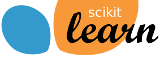

<script>
var tooltipTriggerList = [].slice.call(document.querySelectorAll('[data-bs-toggle="tooltip"]'))
var tooltipList = tooltipTriggerList.map(function (tooltipTriggerEl) {
  return new bootstrap.Tooltip(tooltipTriggerEl)
})
</script>


### Base de dados

Para nossos exemplos, vamos utilizar uma base de dados de processos na área cível, da empresa Vivo. Nosso objetivo será predizer a decisão da sentença de primeiro grau (nossa variável dependente) a partir de uma série de variáveis independentes (comarca, juiz, valor da causa, etc).


In [2]:
vivo = pd.read_csv('https://github.com/jtrecenti/main-cdad2/releases/download/data/vivo.csv')
vivo.head(3)

,id,assunto,valor,virtual,polo_ativo,desfecho_vivo,data_decisao,teve_revelia,data_distribuicao,adv_polo_ativo,...,pags_inicial,pags_contestacao,juiz_tempo_vara,juiz_tempo_posse,juiz_sexo,juiz_rendimento,comarca,circunscricao,regiao,entrancia
0,10353896220148260576,Indenizacao Por Dano Moral,15000.0,Sim,Jailson Fonseca Dos Santos,Derrota (Total ou Parcial),2015-11-26,Não,2014-12-05,Jorge Antonio Pantano Pansani,...,9,6,12.607803,30.324435,Masculino,37547.51,Sao Jose Do Rio Preto,Sao Jose Do Rio Preto,Sj Rio Preto,Entrância Final
1,10023887720148260482,Medida Cautelar,724.0,Sim,Antonio Antenor Da Silva,Derrota (Total ou Parcial),2014-08-19,Não,2014-03-05,Maycon Liduenha Cardoso,...,10,0,10.480493,21.297741,Masculino,34769.26,Presidente Prudente,Presidente Prudente,Presidente Prudente,Entrância Final
2,00012546820158260297,Obrigacao De Fazer / Nao Fazer,20000.0,Não,Aparecido Barbato,Derrota (Total ou Parcial),2015-04-08,Não,2015-02-11,Fabio Cesar Tondato,...,0,0,8.563997,12.509240,Masculino,34903.59,Jales,Jales,Aracatuba,Entrância Final


In [5]:
vivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12137 entries, 0 to 12136
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12137 non-null  object 
 1   assunto            12137 non-null  object 
 2   valor              12088 non-null  float64
 3   virtual            12137 non-null  object 
 4   polo_ativo         12137 non-null  object 
 5   desfecho_vivo      12137 non-null  object 
 6   data_decisao       10835 non-null  object 
 7   teve_revelia       12137 non-null  object 
 8   data_distribuicao  12137 non-null  object 
 9   adv_polo_ativo     11788 non-null  object 
 10  tipo_vara          12137 non-null  object 
 11  vara_foro          12137 non-null  object 
 12  juiz               12125 non-null  object 
 13  pags_inicial       12137 non-null  int64  
 14  pags_contestacao   12137 non-null  int64  
 15  juiz_tempo_vara    12125 non-null  float64
 16  juiz_tempo_posse   121

Nossa variável dependente, então, será a `desfecho_vivo`. Começamos fazendo uma conta delas:

In [8]:
vivo['desfecho_vivo'].value_counts()

desfecho_vivo
Derrota (Total ou Parcial)       6644
Vitória                          3495
Ativo                            1302
Acordo                            504
Extinto sem análise do mérito     134
Desistência                        58
Name: count, dtype: int64

Nessa primeira etapa, vamos trabalhar apenas com os resultados de vitória (da vivo) ou derrota, total ou parcial. Assim, temos uma variável binária, ou seja, com apenas duas categorias. Para facilitar o uso dentro do scikit-learn, vamos dar o valor `1` para o desfecho de vitória e `0` para o desfecho de derrota, colocando isso na variável `y`. Além disso, vamos filtrar a base de dados para ter apenas os casos que tiveram desfecho de vitória ou derrota.

In [3]:
# criando uma variável binária para a variável dependente
vivo['y'] = np.where(vivo['desfecho_vivo'] == 'Vitória', 1, 0)

vivo_f = vivo.query('desfecho_vivo == ["Vitória", "Derrota (Total ou Parcial)"]')

# criamos essa cópia para facilitar as contas que faremos em seguida
vivo_f = vivo_f.copy()

# estamos tirando os vazios dessa variável por enquanto
# depois vamos ver o que fazer com eles
vivo_f = vivo_f.dropna(subset=['juiz_tempo_vara'])

vivo_f.head(3)

,id,assunto,valor,virtual,polo_ativo,desfecho_vivo,data_decisao,teve_revelia,data_distribuicao,adv_polo_ativo,...,pags_contestacao,juiz_tempo_vara,juiz_tempo_posse,juiz_sexo,juiz_rendimento,comarca,circunscricao,regiao,entrancia,y
0,10353896220148260576,Indenizacao Por Dano Moral,15000.0,Sim,Jailson Fonseca Dos Santos,Derrota (Total ou Parcial),2015-11-26,Não,2014-12-05,Jorge Antonio Pantano Pansani,...,6,12.607803,30.324435,Masculino,37547.51,Sao Jose Do Rio Preto,Sao Jose Do Rio Preto,Sj Rio Preto,Entrância Final,0
1,10023887720148260482,Medida Cautelar,724.0,Sim,Antonio Antenor Da Silva,Derrota (Total ou Parcial),2014-08-19,Não,2014-03-05,Maycon Liduenha Cardoso,...,0,10.480493,21.297741,Masculino,34769.26,Presidente Prudente,Presidente Prudente,Presidente Prudente,Entrância Final,0
2,00012546820158260297,Obrigacao De Fazer / Nao Fazer,20000.0,Não,Aparecido Barbato,Derrota (Total ou Parcial),2015-04-08,Não,2015-02-11,Fabio Cesar Tondato,...,0,8.563997,12.509240,Masculino,34903.59,Jales,Jales,Aracatuba,Entrância Final,0


### Treino e teste

No paradigma preditivo, a base de dados é dividida em duas partes: i) treino e ii) teste. A base de treino é utilizada para ajustar o modelo, e a base de teste é utilizada para avaliar a qualidade do modelo ao final da análise. No momento, vamos esquecer completamente a base de teste, e nos concentrar apenas na base de treino.

No scikit learn, geralmente separamos a variável dependente e as variáveis independentes em objetos distintos. Por convenção, vamos chamar a variável dependente de `y` e as variáveis independentes de `X`. A letra maiúscula serve para denotar que `X`, por corresponder a várias colunas da base, é uma matriz, enquanto `y` é minúsculo por corresponder a apenas uma variável.


In [289]:
# Separando as variáveis preditoras/independentes (X) e a variável alvo/dependente (y)
# Vamos começar com um modelo simples, que considera apenas o valor e o tempo de vara do juiz como variáveis independentes.
X = vivo_f[['valor', 'juiz_tempo_vara']]
y = vivo_f['y']

# Dividindo os dados em conjuntos de treino e teste
# Utilizamos esse random_state para garantir que a divisão seja sempre a mesma
# O valor de 0.25 indica que 25% dos dados serão usados para teste
# Esse valor de 0.25 é arbitrário, poderia ser outro valor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.head(10)

,valor,juiz_tempo_vara
1843,13308.0,8.563997
946,8000.0,2.852841
10292,5000.0,8.563997
5858,1000.0,12.416153
2692,7288.0,4.194387
11964,5040.0,4.194387
3208,5000.0,2.852841
2974,38160.0,13.796030
1878,5204.0,6.666667
10661,1000.0,22.036961


In [290]:
# Vamos ver a distribuição da variável dependente nos conjuntos de treino e teste
y_train.value_counts('y')

y
0    0.650388
1    0.349612
Name: proportion, dtype: float64

Alguns comentários sobre o processo de separação:

- `test_size=0.25`: 25% dos dados serão usados para teste, e 80% dos dados serão usados para treino. Esse valor é arbitrário, e pode ser alterado de acordo com a quantidade de dados disponíveis. Por exemplo, se tivermos uma base muito grande, podemos usar um valor menor para teste, como 0.1 (10% dos dados para teste e 90% para treino).
- `random_state=42`: é uma semente para a função `train_test_split`. Isso garante que, se você rodar o código novamente, a base de treino e teste será a mesma, o que é importante para comparar modelos.

## Regressão logística

Para os exemplos abaixo, vamos utilizar um **modelo de classificação binária**, onde a variável dependente é binária (apenas duas categorias). Nosso objetivo é prever a decisão da sentença de primeiro grau a partir de uma série de variáveis independentes.


Como vimos na apostila de correlação e regressão: a regressão logística é uma generalização da regressão linear para variáveis dependentes binárias. A regressão logística é dada pela fórmula:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p)}}
$$

Onde $p$ é a probabilidade de a variável dependente ser 1, $e$ é o número de Euler (aproximadamente 2.71828), e $\beta_0, \beta_1, ..., \beta_p$ são os coeficientes da regressão. A interpretação dos coeficientes é a mesma da regressão linear: o coeficiente $\beta_1$ é a mudança na probabilidade de a variável dependente ser 1 para uma unidade a mais de $x_1$, mantendo todas as outras variáveis constantes.

Para entender a fórmula, vamos olhar um caso com apenas uma variável independente. Nesse caso, a fórmula da regressão logística é:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}} = g(\beta_0 + \beta_1x)
$$

Veja que, ainda que a relação entre a variável de interesse (dependente) e a variável explicativa (independente) tenha uma forma estranha, a equação que associa os parâmetros da variável explicativa ainda é linear. Por isso que a regressão logística faz parte da classe de "modelos lineares generalizados".

Por exemplo, digamos que a variável independente seja o valor pedido na ação. Os valores ajustados da regressão logística ficariam com o seguinte desenho:


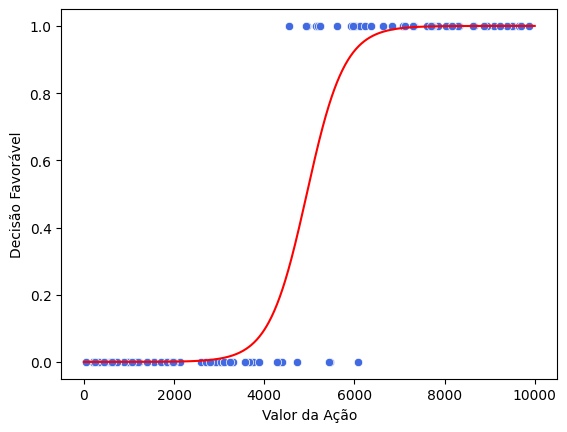

In [130]:
# Obs: o código abaixo foi usado apenas para gerar o gráfico. Vamos olhar com mais calma o que ele faz mais para frente

def grafico_modelo(model):
  # Gerar dados de exemplo
  np.random.seed(42)
  X = np.random.rand(100, 1) * 10000  # Valores da ação entre 0 e 10000
  y = (X > 5000 + np.random.normal(0, 1000, size=(100, 1))).astype(int).ravel()  # Decisão favorável com incerteza

  # Ajustar o modelo de regressão logística
  model.fit(X, y)

  # Criar pontos para a curva logística
  X_plot = np.linspace(0, 10000, 1000).reshape(-1, 1)
  y_plot = model.predict_proba(X_plot)[:, 1]

  df_line = pd.DataFrame({
    'X': X_plot.ravel(),
    'y': y_plot,
  })

  df_scatter = pd.DataFrame({
    'X': X.ravel(),
    'y': y,
  })

  sns.scatterplot(data=df_scatter, x='X', y='y', color = 'royalblue')
  sns.lineplot(data=df_line, x='X', y='y', color = 'red')
  plt.xlabel('Valor da Ação')
  plt.ylabel('Decisão Favorável')

model = LogisticRegression()
grafico_modelo(model)

Note que os dados (os pontos em azul) são sempre 0 ou 1, por serem categóricos. É possível observar, no exemplo, que na faixa de valores entre 4000 e 6000, é possível encontrar tanto casos procedentes quanto improcedentes. Já abaixo de 4000, praticamente tudo é improcedente e, acima de 6000, praticamente tudo é procedente. O que a curva logística faz é ajustar uma curva que mostra a incerteza do modelo nos casos em que há uma sobreposição dos valores da variável independente.

Vale notar, novamente, que apesar de termos uma curva que é fácil de visualizar e interpretar, nosso interesse não é, nesse momento, interpretar a curva. Nosso interesse é utilizar o modelo para prever a decisão da sentença de primeiro grau. Para isso, precisaremos extrair métricas de qualidade do modelo que nos permitam comparar diferentes modelos e escolher o melhor deles. Ou seja, a visualização é boa para dar a intuição, mas não é nosso objetivo final.


### Ajustando um modelo de regressão logística

Para ajustar um modelo de regressão logística, vamos utilizar a função `LogisticRegression` da biblioteca `scikit-learn`.

Lembre-se que, para ajustar um modelo de classificação, precisamos de uma base de treino. Testamos a qualidade do modelo na base de teste.



In [118]:
# cria um modelo vazio
modelo = LogisticRegression()

# ajusta o modelo
modelo_ajustado = modelo.fit(X_train, y_train)

# imprime o modelo
modelo_ajustado

c:\Users\julio\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Agora, não temos mais um `.summary()`, como existia no statsmodels, para estudar os resultados do modelo. Apenas por completude, vamos ajustar o mesmo modelo no statsmodels:

In [293]:
# não vamos mais usar statsmodels, é apenas para mostrar como seria a mesma coisa com ele
import statsmodels.formula.api as smf

modelo_stats = smf.logit(
  'y ~ valor + juiz_tempo_vara',
  data=X_train.join(y_train)
).fit()

modelo_stats.summary()

Optimization terminated successfully.
         Current function value: 0.588215
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7597
Model:                          Logit   Df Residuals:                     7594
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                 0.09115
Time:                        22:17:24   Log-Likelihood:                -4468.7
converged:                       True   LL-Null:                       -4916.8
Covariance Type:            nonrobust   LLR p-value:                2.333e-195
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1606      0.071     16.267      0.000       1.021       1.300
valor           -3.039e-05   5.38e-06     -5.650      0.000   -4.09e-05   -1.98e-05
juiz_tempo_vara    -0.2400      0.009    -26.696      0.000      -0.258      -0.222
===================================================================================
"""

Vamos comparar os valores ajustados pelo modelo com os valores obtidos no scikit-learn:

In [269]:
# extraindo pelo statsmodels
modelo_stats.params

Intercept          1.160603
valor             -0.000030
juiz_tempo_vara   -0.239957
dtype: float64

In [270]:
# extraindo pelo sklearn
modelo_ajustado.intercept_, modelo_ajustado.coef_

(array([1.16048347]), array([[-3.03864461e-05, -2.39937825e-01]]))

Veja que os valores batem, mas a forma de extrair os valores ajustados é diferente. No statsmodels, usamos o `.params` para obter os valores ajustados, enquanto na regressão logística do scikit-learn usamos o `.intercept_` e o `coef_`.

## Métricas de qualidade do modelo

Agora, como podemos calcular a acurácia do modelo? A acurácia é a proporção de casos que o modelo acertou. Para calcular a acurácia, vamos usar a o método `.score()` da biblioteca `scikit-learn`. Esse método calcula a acurácia do modelo, ou seja, a proporção de casos que o modelo acertou. Vamos calcular a acurácia do modelo para a base de treino e para a base de teste.

In [271]:
# na base de treino
modelo.score(X_train, y_train)

0.6935632486507832

In [272]:
# na base de teste

modelo_ajustado.score(X_test, y_test)

0.7039084090011843

Veja que as acurácias na base de treino e de teste são diferentes. No caso, a acurácia na base de teste está maior. Quando a acurácia na base de treino é bem maior que na base de teste, isso é sinal de que o modelo está com problemas de overfitting. Ou seja, o modelo está muito ajustado à base de treino, e não consegue generalizar para a base de teste, que é o que usamos para avaliar como o modelo se comportaria em novos casos.

### Como a acurácia é calculada?

Vamos relembrar nosso modelo:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2)}} = g(\beta_0 + \beta_1x_1 + \beta_2x_2)
$$

A saída do modelo é um número entre zero e um, representando uma probabilidade. No entanto, nossa variável dependente ou é zero, ou é um. Para calcular a acurácia, portanto, precisamos transformar a saída do modelo em uma variável binária. Uma forma de fazer isso é considerar que, se a saída do modelo for maior que 0.5, a variável dependente é 1, e se for menor que 0.5, a variável dependente é 0. Isso é feito automaticamente pelo método `.score()` por trás dos panos.

Vamos ver isso na prática. Vamos calcular a acurácia manualmente, a partir da saída do modelo. Para isso, vamos usar o método `.decision_function()` da regressão logística, que nos dá a saída do modelo para cada observação. Vamos considerar que, se a saída do modelo for maior que 0.5, a variável dependente é 1, e se for menor que 0.5, a variável dependente é 0. Vamos comparar essa saída com a variável dependente real, e calcular a acurácia manualmente.

In [273]:
prob_predito = modelo_ajustado.predict_proba(X_test)[:,1]
valor_predito = np.where(prob_predito > 0.5, 1, 0)

np.mean(valor_predito == y_test)

0.7039084090011843

In [274]:
# lembrando do score calculado:
modelo.score(X_test, y_test)

0.7039084090011843

### Só a acurácia interessa?

Dependendo do que estamos querendo prever, a acurácia pode não ser a melhor métrica. Por exemplo, se estamos interessados em prever casos raros, a acurácia pode ser uma métrica enganosa. Imagine que temos uma base de dados com 99% de casos de vitória e 1% de casos de derrota. Se um modelo chutar que todos os casos são de vitória, ele terá uma acurácia de 99%. No entanto, ele não está fazendo um bom trabalho em prever os casos de derrota, certo?

Para lidar com isso, precisamos dar atenção aos erros e acertos do modelo, dependendo de qual é o valor da variável dependente. A ferramenta utilizada para visualizar todos esses erros e acertos é a matriz de confusão. A matriz de confusão é uma tabela que mostra os acertos e erros do modelo, separados por categoria da variável dependente.

Para calcular a matriz de confusão, vamos usar a função `confusion_matrix` da biblioteca `scikit-learn`. Vamos calcular a matriz de confusão para a base de teste.

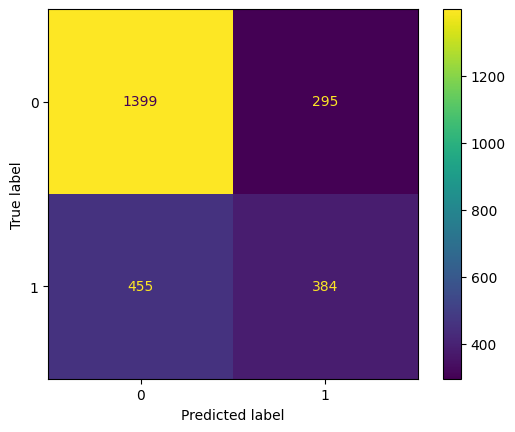

In [213]:
# utilizando as previsoes
ConfusionMatrixDisplay.from_predictions(y_test, valor_predito)

A mesma matriz pode ser obtida utilizando a função `from_estimator()`, evitando que tenhamos de fazer a previsão manualmente.

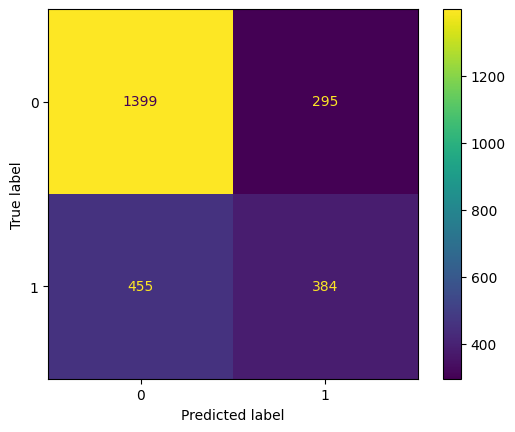

In [275]:
# utilizando o modelo
ConfusionMatrixDisplay.from_estimator(modelo_ajustado, X_test, y_test)

Vamos explicar os quadrantes da matriz de confusão:

No eixo x, temos os valores preditos (0 para derrota, 1 para vitória). No eixo y, temos os valores reais (0 para derrota, 1 para vitória). Os quadrantes da matriz de confusão são:

- Canto superior esquerdo: verdadeiros negativos (VN). São os casos em que o modelo previu 0 e o valor real era 0.
- Canto superior direito: falsos positivos (FP). São os casos em que o modelo previu 1, mas o valor real era 0.
- Canto inferior esquerdo: falsos negativos (FN). São os casos em que o modelo previu 0, mas o valor real era 1.
- Canto inferior direito: verdadeiros positivos (VP). São os casos em que o modelo previu 1 e o valor real era 1.

A tabela abaixo resume a matriz de confusão:

<table>
  <tr>
    <th></th>
    <th>Predito: Negativo (0)</th>
    <th>Predito: Positivo (1)</th>
  </tr>
  <tr>
    <th>Verdade: Negativo (0)</th>
    <td>VN (Verdadeiro Negativo)</td>
    <td>FP (Falso Positivo)</td>
  </tr>
  <tr>
    <th>Verdade: Positivo (1)</th>
    <td>FN (Falso Negativo)</td>
    <td>VP (Verdadeiro Positivo)</td>
  </tr>
</table>



Idealmente, gostaríamos que a matriz de confusão tivesse apenas valores na diagonal principal, ou seja, apenas verdadeiros positivos e verdadeiros negativos. No entanto, isso é raro de acontecer. O que queremos, então, é que o modelo tenha o menor número possível de falsos positivos e falsos negativos.

No nosso caso, o valor de VN é bem alto, então o modelo parece estar acertando bem os casos de derrota. No entanto, o valor de FN também é bem alto, então o modelo está errando bastante nos casos de vitória. 

Já os valores de FN e VP são bem baixos. Isso é um sinal de que o modelo está tendendo a prever tudo como derrota. Veja que ele decidiu marcar apenas 2 casos como vitória! Isso é um problema, e vamos corrigir em breve.

Pela terminologia, a acurácia é dada por

$$
\text{Acurácia} = \frac{VN + VP}{VN + FP + FN + VP}
$$

No nosso caso, substituindo os valores:

$$
\text{Acurácia} = \frac{1399 + 384}{1399 + 295 + 455 + 384} = 0.70
$$

Como vimos, a acurácia sozinha não consegue capturar tudo o que desejaríamos para entender a qualidade do modelo. Então vamos ver outras métricas que podem ser úteis.

### Precision, recall e f1-score

Além da acurácia, temos outras métricas que podem ser úteis para avaliar a qualidade do modelo. Duas métricas muito utilizadas são a *precision* (precisão) e o *recall* (revocação). 

A precisão é a proporção de verdadeiros positivos em relação ao total de casos previstos como positivos. Pela terminologia da matriz de confusão:

$$
\text{Precisão} = \frac{VP}{VP + FP}
$$

Na tabela, podemos visualizar pela coluna de preditos positivos:

<table>
  <tr>
    <th></th>
    <th>Predito: Negativo (0)</th>
    <th>Predito: Positivo (1)</th>
  </tr>
  <tr>
    <th>Verdade: Negativo (0)</th>
    <td>VN (Verdadeiro Negativo)</td>
    <td style="background-color: #ffcccc;">FP (Falso Positivo)</td>
  </tr>
  <tr>
    <th>Verdade: Positivo (1)</th>
    <td>FN (Falso Negativo)</td>
    <td style="background-color: #ffcccc;">VP (Verdadeiro Positivo)</td>
  </tr>
</table>

No nosso caso, o valor seria:

$$
\text{Precisão} = \frac{384}{384 + 295} = 0.56
$$

Ou seja, nosso modelo tem precisão zero.

A revocação é a proporção de verdadeiros positivos em relação ao total de casos reais positivos. Pela terminologia da matriz de confusão:

$$
\text{Revocação} = \frac{VP}{VP + FN}
$$

Na tabela, podemos visualizar pela linha de verdadeiros positivos:

<table>
  <tr>
    <th></th>
    <th>Predito: Negativo (0)</th>
    <th>Predito: Positivo (1)</th>
  </tr>
  <tr>
    <th>Verdade: Negativo (0)</th>
    <td>VN (Verdadeiro Negativo)</td>
    <td>FP (Falso Positivo)</td>
  </tr>
  <tr>
    <th>Verdade: Positivo (1)</th>
    <td style="background-color: #ffcccc;">FN (Falso Negativo)</td>
    <td style="background-color: #ffcccc;">VP (Verdadeiro Positivo)</td>
  </tr>
</table>

No nosso caso, o valor seria:

$$
\text{Revocação} = \frac{384}{384 + 455} = 0.46
$$


Finalmente, temos a f1-score, que é a média harmônica entre precisão e recall. Por combinar precisão e recall, é útil quando temos classes desbalanceadas.

$$
\text{F1-score} = 2 \times \frac{\text{Precisão} \times \text{Revocação}}{\text{Precisão} + \text{Revocação}}
$$

Pela tabela, podemos visualizar pela coluna de preditos positivos e pela linha de verdadeiros positivos:

<table>
  <tr>
    <th></th>
    <th>Predito: Negativo (0)</th>
    <th>Predito: Positivo (1)</th>
  </tr>
  <tr>
    <th>Verdade: Negativo (0)</th>
    <td>VN (Verdadeiro Negativo)</td>
    <td style="background-color: #ffcccc;">FP (Falso Positivo)</td>
  </tr>
  <tr>
    <th>Verdade: Positivo (1)</th>
    <td style="background-color: #ffcccc;">FN (Falso Negativo)</td>
    <td style="background-color: #ffccee;">VP (Verdadeiro Positivo)</td>
  </tr>
</table>

No nosso caso, o F1-score seria:

$$
\text{F1-score} = 2 \times \frac{0.56 \times 0.46}{0.56 + 0.46} = 0.51
$$



### Escolhendo o valor de corte

Os valores que calculamos acima valem para o valor de corte de 0.5, ou seja, se a saída do modelo for maior que 0.5, a predição para variável dependente é 1, e se for menor que 0.5, a variável dependente é 0. No entanto, podemos variar o valor de corte para ver como as métricas se comportam. E isso afeta as métricas de precisão e recall.

Por exemplo, se reduzirmos o valor de corte para 0.01, o modelo vai prever muito mais casos como vitória. Isso aumenta o número de verdadeiros positivos, mas também aumenta o número de falsos positivos. Ou seja, isso pode aumentar a revocação, mas diminui a precisão. Se, por outro lado, aumentarmos o valor de corte para 0.99, o modelo vai prever muito menos casos como vitória. Isso diminui o número de falsos positivos, mas também diminui o número de verdadeiros positivos. Ou seja, isso pode (ou não) aumentar a precisão, mas diminui a revocação.

Vamos ver como ficam as métricas para diferentes valores de corte. Para isso, vamos usar o método `predict_proba()` da regressão logística, que nos dá a probabilidade de cada observação ser 0 ou 1. Vamos variar o valor de corte de 0.01 a 0.99, e calcular as métricas para cada valor de corte.

,Corte,Precision,Recall,Accuracy,F1-Score
0,0.000000,0.331228,1.000000,0.331228,0.497628
1,0.010101,0.331225,0.998808,0.331623,0.497477
2,0.020202,0.331616,0.997616,0.333202,0.497770
3,0.030303,0.331352,0.996424,0.332807,0.497323
4,0.040404,0.332803,0.996424,0.337150,0.498956
...,...,...,...,...,...
95,0.959596,0.000000,0.000000,0.668772,0.000000
96,0.969697,0.000000,0.000000,0.668772,0.000000
97,0.979798,0.000000,0.000000,0.668772,0.000000
98,0.989899,0.000000,0.000000,0.668772,0.000000


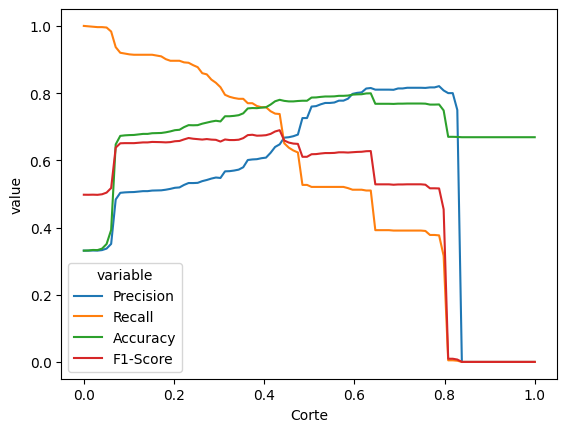

In [81]:
def grafico_calibracao(modelo):
  prob_predito = modelo.predict_proba(X_test)[:,1]

  # Definindo intervalos de valores de corte
  cortes = np.linspace(0, 1, 100)

  # Listas para armazenar as métricas
  precision_scores = []
  recall_scores = []
  accuracy_scores = []
  f1_scores = []

  # Calculando as métricas para diferentes valores de corte
  for corte in cortes:
    y_pred = (prob_predito >= corte).astype(int)
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

  # Criando um DataFrame com os resultados
  df = pd.DataFrame({
    'Corte': cortes,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'Accuracy': accuracy_scores,
    'F1-Score': f1_scores
  })

  df_melt = df.melt(id_vars='Corte', value_vars=['Precision', 'Recall', 'Accuracy', 'F1-Score'])

  sns.lineplot(
    data=df_melt,
    x='Corte',
    y='value',
    hue='variable'
  )

  return(df)

grafico_calibracao(modelo_ajustado)

No gráfico, veja que existe uma faixa de valores entre 0.2 e 0.4 em que a precisão e a revocação são altas (e, portanto, o F1 também). A acurácia também acompanha essas curvas (apesar de isso não ser uma regra geral). Isso é um sinal de que, nessa faixa de valores, o modelo está conseguindo prever bem. 

O melhor valor de corte depende muito da aplicação. Se nosso interesse está em acertar os casos em que a Vivo perde, talvez seja melhor usar um valor de corte mais alto, para diminuir os falsos positivos. Se nosso interesse está em acertar os casos em que a Vivo ganha, talvez seja melhor usar um valor de corte mais baixo, para diminuir os falsos negativos. Se o interesse é ter um equilíbrio entre os dois, talvez seja melhor usar um valor de corte que maximiza o F1-score.

### Curva ROC

O último critério que vamos ver é a curva ROC. A curva ROC é uma curva que mostra a relação entre a revocação e a taxa de falsos positivos. Vamos ver como ela é construída.

Text(0, 0.5, 'Taxa de Verdadeiros Positivos (Recall)')

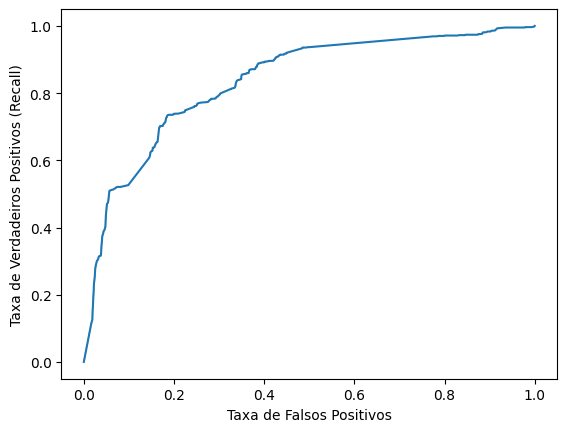

In [138]:

# valores importantes da curva ROC
false_positive, recall, cortes = roc_curve(y_test, prob_predito)

df_valores = pd.DataFrame({
  'Falsos Positivos': false_positive,
  'Recall': recall,
  'Corte': cortes,
  'Diferença': recall - false_positive
})

sns.lineplot(data = df_valores, x = 'Falsos Positivos', y = 'Recall')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')


Idealmente, gostaríamos que a curva ROC estivesse o mais próximo possível do canto superior esquerdo, ou seja, com revocação 1 e taxa de falsos positivos 0. Isso significaria que o modelo está acertando todos os casos positivos e errando nada dos casos negativos. No entanto, isso é quase impossível de acontecer. O que queremos, então, é que o valor de corte que faz com que a curva ROC esteja o mais próximo possível do canto superior esquerdo.

In [139]:
df_valores.sort_values('Diferença', ascending=False).head(10)

,Falsos Positivos,Recall,Corte,Diferença
226,0.184770,0.735399,0.437420,0.550630
227,0.187131,0.735399,0.436573,0.548268
225,0.184770,0.733015,0.437463,0.548246
228,0.188312,0.735399,0.436562,0.547088
229,0.189492,0.735399,0.436462,0.545907
223,0.183589,0.728248,0.437665,0.544659
221,0.182409,0.727056,0.437701,0.544648
230,0.191854,0.735399,0.436443,0.543546
224,0.184770,0.728248,0.437534,0.543478
222,0.183589,0.727056,0.437675,0.543467


O melhor corte é algo em torno de 0.34. Esse valor maximiza a revocação e minimiza a taxa de falsos positivos. Esse valor também está próximo do valor que maximiza o F1-score. Esses valores, no entanto, não precisam ser exatamente iguais. Dependendo da aplicação, podemos escolher um valor de corte que maximiza a revocação, a precisão, o F1-score, a acurácia ou qualquer outra métrica que seja importante.

O mais interessante da curva ROC é que ela nos dá uma métrica que não depende do valor de corte. Esse valor é a **área abaixo da curva**, ou **AUC**. A AUC é uma métrica que varia de 0 a 1, e que nos dá uma ideia de quão bem o modelo está conseguindo separar as classes. Se o modelo tivesse taxa de falsos positivos zero e revocação 1 para algum corte, a AUC seria 1, porque seria a área abaixo de um quadrado unitário.

In [279]:
# calculando AUC

auc = roc_auc_score(y_test, prob_predito)

auc

0.7167226261656862

Nesse caso, a área abaixo da curva é 0.717. Isso significa que o modelo está conseguindo separar as classes razoavelmente bem. No entanto, ainda há espaço para melhorias. Para isso, vamos adicionar algumas variáveis categóricas no modelo.

### Adicionando variáveis categóricas

Vamos adicionar algumas variáveis categóricas no modelo. Para isso, precisamos transformar essas variáveis em variáveis *dummy*. Uma variável *dummy* é uma variável que assume apenas dois valores, 0 ou 1. Fazemos isso para que o modelo consiga interpretar a variável categórica, porque o modelo só sabe lidar com variáveis numéricas.

Para transformar uma variável categórica em variáveis *dummy*, vamos usar a função `pd.get_dummies()` do pandas.


In [7]:
dummies_comarca = pd.get_dummies(vivo_f['comarca']).astype(int)

dummies_comarca.head(6)

,Fernandopolis,Jales,Palmeira D'oeste,Presidente Prudente,Santa Fe Do Sul,Sao Jose Do Rio Preto
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0


Note que a variável `comarca` foi transformada em várias variáveis *dummy*, uma para cada categoria. Existe um detalhe, no entanto, que é importante levar em conta. Se temos $n$ categorias, precisamos de $n-1$ variáveis *dummy*. Isso porque a última categoria é redundante: se todas as outras variáveis *dummy* forem zero, a última variável *dummy* será 1. Isso é o que chamamos de *dummy trap*. Para evitar o *dummy trap*, vamos usar o argumento `drop_first=True` na função `pd.get_dummies()`.

In [8]:
# evitar dummy trap

dummies_comarca = pd.get_dummies(vivo_f['comarca'], drop_first=True).astype(int)

dummies_comarca.head(6)

,Jales,Palmeira D'oeste,Presidente Prudente,Santa Fe Do Sul,Sao Jose Do Rio Preto
0,0,0,0,0,1
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,1,0,0,0,0


Agora, podemos recriar nossas variáveis X e y (treino e teste), e ajustar o modelo de regressão logística com as novas variáveis.

In [9]:
vivo_f_com_dummies = pd.concat([vivo_f, dummies_comarca], axis=1)

X = vivo_f_com_dummies[['valor', 'juiz_tempo_vara'] + list(dummies_comarca.columns)]
y = vivo_f_com_dummies['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.head(5)

,valor,juiz_tempo_vara,Jales,Palmeira D'oeste,Presidente Prudente,Santa Fe Do Sul,Sao Jose Do Rio Preto
1843,13308.0,8.563997,1,0,0,0,0
946,8000.0,2.852841,0,0,0,0,0
10292,5000.0,8.563997,1,0,0,0,0
5858,1000.0,12.416153,0,0,0,0,1
2692,7288.0,4.194387,0,1,0,0,0


Agora, ajustamos o modelo com as novas variáveis. Vamos ver como ficaram as métricas do modelo na base de teste.

In [10]:
# ajusta o modelo logístico
modelo = LogisticRegression()
modelo_ajustado = modelo.fit(X_train, y_train)

c:\Users\julio\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Note que o scikit reclamou que o número de iterações atingiu o limite. Isso ocorreu por um problema numérico, que pode ser resolvido aumentando o número de iterações. Vamos fazer isso e ajustar o modelo novamente.

In [11]:
modelo = LogisticRegression(max_iter=1000)
modelo_ajustado = modelo.fit(X_train, y_train)

# valores ajustados para o modelo
modelo_ajustado.coef_

array([[-4.83166624e-05, -3.87288375e-02, -2.31050884e+00,
         1.57771461e+00, -1.75101445e-01,  8.45865179e-01,
        -3.27685073e-01]])

Agora funcionou! Vamos obter agora todas as métricas de interesse.

In [12]:
acuracia = modelo_ajustado.score(X_test, y_test)

acuracia

0.7868140544808527

A acurácia na base de teste ficou em 0.787, que é 8% maior que o modelo anterior. Vale a pena, no entanto, olhar todas as outras métricas, usando a função que criamos anteriormente.

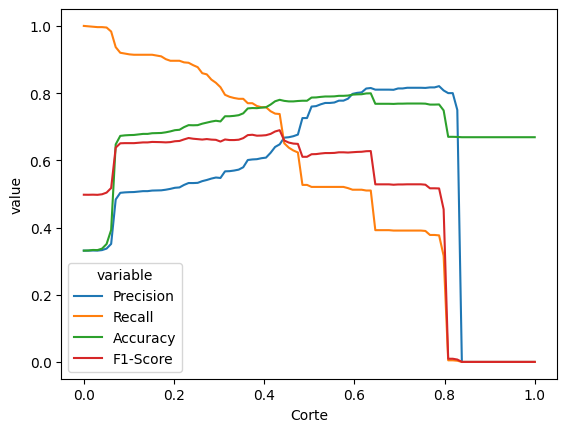

In [76]:
grafico_calibracao(modelo_ajustado)

O desenho das curvas de precisão, revocação, acurácia e F1-score parece ter ficado mais suave. Agora, podemos ver que o valor de corte que maximiza a acurácia é claramente diferente o valor de corte que maximiza o F1-score.

Text(0, 0.5, 'Taxa de Verdadeiros Positivos (Recall)')

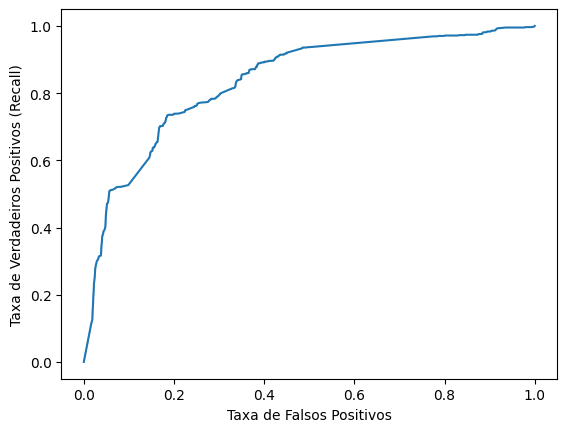

In [14]:
# valores importantes da curva ROC
false_positive, recall, cortes = roc_curve(y_test, prob_predito)

sns.lineplot(x = false_positive, y = recall)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')

In [15]:
auc = roc_auc_score(y_test, prob_predito)

auc

0.8358540906487598

Agora chegamos em um AUC de 83.6%, o que é um valor bem melhor do que tínhamos antes.

Em seguida, veremos ver se conseguimos melhorar ainda mais nossos resultados mudando o modelo para uma árvore de decisão.


## Modelos baseados em árvores

O modelo logístico é uma excelente ferramenta para construir modelos que ajudam a predizer o resultado de um processo. No entanto, ele tem algumas limitações. Uma delas é que ele assume que a relação entre as variáveis independentes e a variável dependente é **linear**. Isso pode ser um problema em casos em que a relação é não-linear. Outra limitação é que ele assume que as variáveis independentes não atuam de forma conjunta, ou seja, cada uma tem um efeito separado. Isso pode ser um problema quando as variáveis independentes interagem entre si.

A árvore de decisão é um modelo que consegue lidar com essas situações. Trata-se de um modelo que divide a base de dados em subgrupos, de forma a maximizar a homogeneidade dentro de cada subgrupo. Ela cria regras de corte baseadas nos dados, de forma que a conclusão sobre a variável dependente seja o resultado de várias perguntas de sim/não.

Vamos ajustar um modelo de árvore de decisão para a base de dados da Vivo. Para isso, vamos usar a função `DecisionTreeClassifier` da biblioteca `scikit-learn`. Vamos considerar o modelo com as variáveis categóricas. 

**Obs**: outra vantagem dos modelos com árvores é que não precisamos transformar as variáveis categóricas em variáveis *dummy*, porque a árvore pode criar regras de corte baseadas nas categorias. No entanto, infelizmente, o modelo de árvore do `scikit-learn` não sabe trabalhar com variáveis categóricas. Por isso, ainda precisamos transformar as variáveis categóricas em variáveis *dummy*.

Veja como ficaria o desenho da regressão logística com uma variável, mas utilizando árvores de decisão:



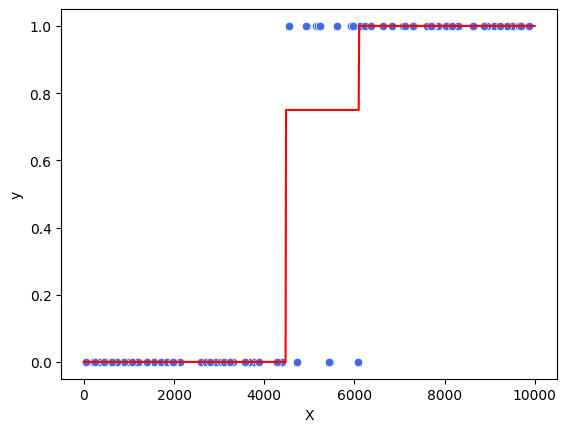

In [128]:
model = DecisionTreeClassifier(max_depth=2)
grafico_modelo(model)




### Exemplo da Vivo


Aqui, consideramos um parâmetro chamado `max_depth`, que controla a profundidade da árvore. Quanto maior o valor de `max_depth`, mais complexa a árvore. Com `max_depth=3`, a árvore ficará assim:

In [99]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)

modelo_arvore_ajustado = modelo_arvore.fit(X_train, y_train)

[Text(0.5, 0.875, 'juiz_tempo_vara <= 6.935\ngini = 0.455\nsamples = 7597\nvalue = [4941, 2656]\nclass = Derrota'),
 Text(0.25, 0.625, 'valor <= 8229.7\ngini = 0.477\nsamples = 3546\nvalue = [1395, 2151]\nclass = Vitória'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'juiz_tempo_vara <= 3.485\ngini = 0.432\nsamples = 2843\nvalue = [899, 1944]\nclass = Vitória'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 1118\nvalue = [543, 575]\nclass = Vitória'),
 Text(0.1875, 0.125, 'gini = 0.328\nsamples = 1725\nvalue = [356, 1369]\nclass = Vitória'),
 Text(0.375, 0.375, 'Presidente Prudente <= 0.5\ngini = 0.416\nsamples = 703\nvalue = [496.0, 207.0]\nclass = Derrota'),
 Text(0.3125, 0.125, 'gini = 0.367\nsamples = 628\nvalue = [476.0, 152.0]\nclass = Derrota'),
 Text(0.4375, 0.125, 'gini = 0.391\nsamples = 75\nvalue = [20.0, 55.0]\nclass = Vitória'),
 Text(0.75, 0.625, 'juiz_tempo_vara <= 12.33\ngini = 0.218\nsamples = 4051\nvalue = [3546, 505]\nclass = Derrota'),
 Text(0.625, 0.75, '  Fals

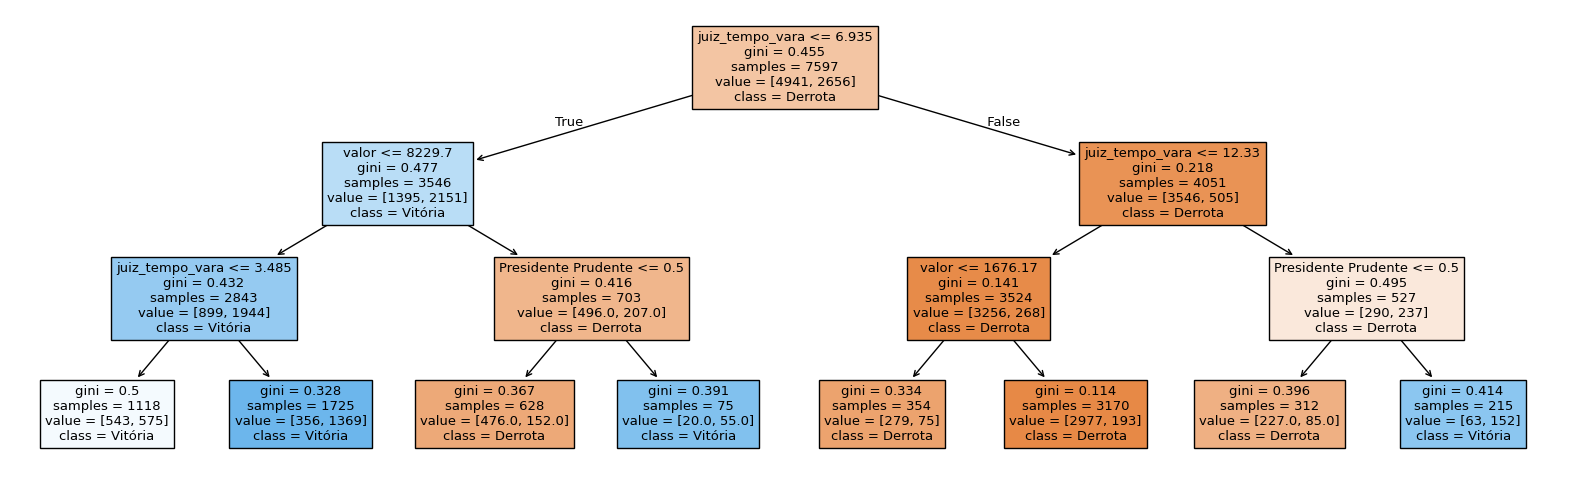

In [100]:
fig = plt.figure(figsize=(20,6))
plot_tree(modelo_arvore_ajustado, feature_names=X_train.columns, class_names=['Derrota', 'Vitória'], filled=True)

A primeira regra é `juiz_tempo_vara <= 6.935`. Se essa regra for verdadeira, a árvore vai para a esquerda. Se for falsa, a árvore vai para a direita. Se a árvore for para a esquerda, a próxima regra é `valor <= 8229.7`. Se essa regra for verdadeira, a árvore vai para a esquerda. Se for falsa, a árvore vai para a direita. E assim por diante. No caso das variáveis categóricas, a regra é criada com o valor `0.5`, para separar os valores 0 e 1 das dummies.

Por exemplo:

- Valor da causa: 10000
- Tempo de vara do juiz: 5
- Comarca: Presidente Prudente

Nessas regras, vamos andar primeiro para a esquerda, porque `juiz_tempo_vara <= 6.935` é verdadeiro. Em seguida, vamos para a direita, porque `valor <= 8229.7` é falso. E, por fim, vamos para a direita, porque `Presidente Prudente <= 0.5` é falso. Nesse caso, a previsão do modelo é "Vitória".

Agora vamos ver uma árvore com `max_depth=4`.


[Text(0.5, 0.9, 'juiz_tempo_vara <= 6.935\ngini = 0.455\nsamples = 7597\nvalue = [4941, 2656]\nclass = Derrota'),
 Text(0.25, 0.7, 'valor <= 8229.7\ngini = 0.477\nsamples = 3546\nvalue = [1395, 2151]\nclass = Vitória'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'juiz_tempo_vara <= 3.485\ngini = 0.432\nsamples = 2843\nvalue = [899, 1944]\nclass = Vitória'),
 Text(0.0625, 0.3, 'valor <= 3036.0\ngini = 0.5\nsamples = 1118\nvalue = [543, 575]\nclass = Vitória'),
 Text(0.03125, 0.1, 'gini = 0.201\nsamples = 97\nvalue = [86, 11]\nclass = Derrota'),
 Text(0.09375, 0.1, 'gini = 0.495\nsamples = 1021\nvalue = [457, 564]\nclass = Vitória'),
 Text(0.1875, 0.3, 'valor <= 4177.22\ngini = 0.328\nsamples = 1725\nvalue = [356, 1369]\nclass = Vitória'),
 Text(0.15625, 0.1, 'gini = 0.397\nsamples = 44\nvalue = [32, 12]\nclass = Derrota'),
 Text(0.21875, 0.1, 'gini = 0.311\nsamples = 1681\nvalue = [324, 1357]\nclass = Vitória'),
 Text(0.375, 0.5, 'Presidente Prudente <= 0.5\ngini = 0.416\nsamples = 

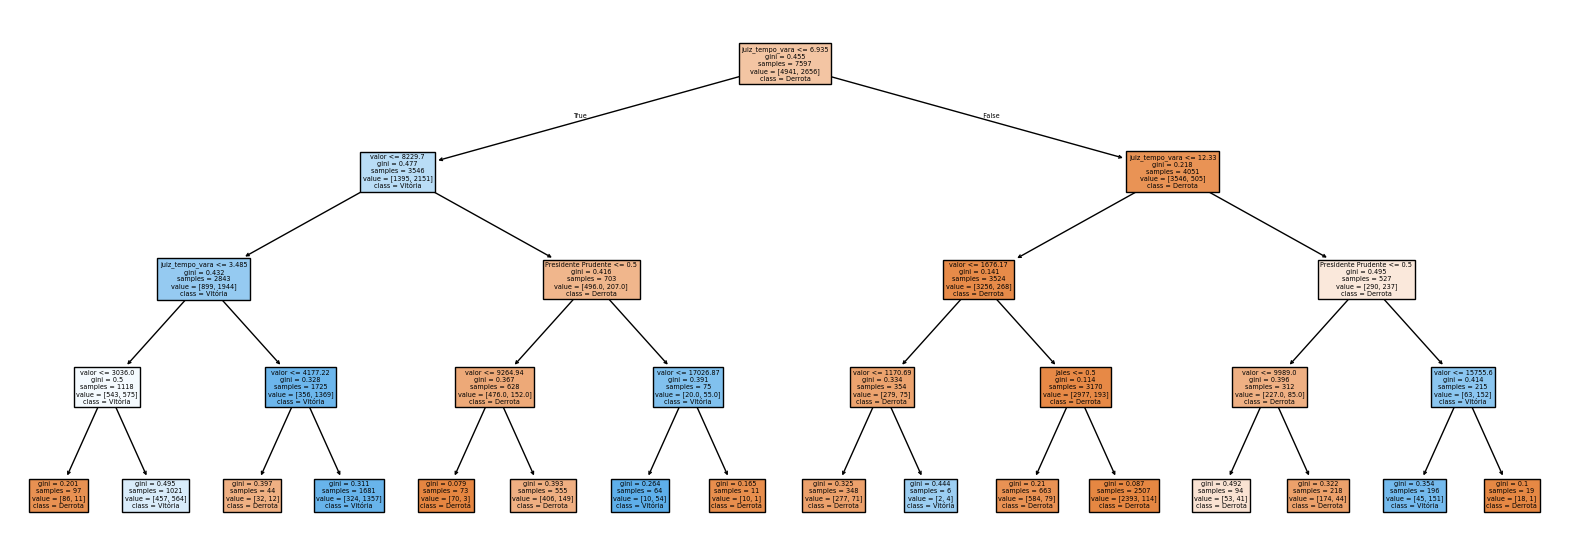

In [101]:
modelo_arvore = DecisionTreeClassifier(max_depth = 4)

modelo_arvore_ajustado = modelo_arvore.fit(X_train, y_train)

fig = plt.figure(figsize=(20,7))
plot_tree(modelo_arvore_ajustado, feature_names=X_train.columns, class_names=['Derrota', 'Vitória'], filled=True)

Veja que agora os ramos da árvore estão mais complexos, e as regras de classificação podem ser mais complicadas.

O que você acha que acontece quando a árvore fica muito complexa?

### Overvitting em árvores

O maior problema das árvores de classificação é que elas são muito suscetíveis ao overfitting. Isso acontece porque a árvore pode criar regras muito específicas para a base de treino, que não generalizam bem para a base de teste. Isso é um problema, porque o objetivo do modelo é prever bem a base de teste, e não a base de treino.

Vamos ver isso acontecendo na prática. Vamos ajustar modelos com diferentes valores de `max_depth`, e ver como eles se comportam na base de treino e na base de teste.

<Axes: xlabel='Profundidade', ylabel='value'>

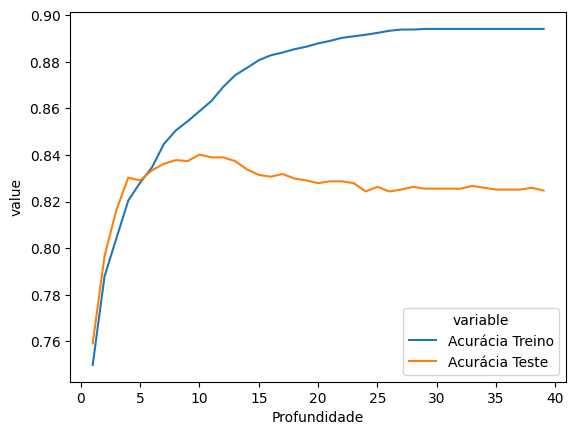

In [102]:
acuracia_treino = []
acuracia_teste = []
profundidades = range(1, 40)
for profundidade in profundidades:
  modelo_arvore = DecisionTreeClassifier(max_depth = profundidade)
  modelo_arvore_ajustado = modelo_arvore.fit(X_train, y_train)
  acuracia_treino.append(modelo_arvore_ajustado.score(X_train, y_train))
  acuracia_teste.append(modelo_arvore_ajustado.score(X_test, y_test))

df_arvores = pd.DataFrame({
  'Profundidade': profundidades,
  'Acurácia Treino': acuracia_treino,
  'Acurácia Teste': acuracia_teste
})

df_melt = df_arvores.melt(id_vars='Profundidade', value_vars=['Acurácia Treino', 'Acurácia Teste'])

sns.lineplot(
  data=df_melt,
  x='Profundidade',
  y='value',
  hue='variable'
)

In [104]:
df_arvores.sort_values('Acurácia Teste', ascending=False).head(5)

,Profundidade,Acurácia Treino,Acurácia Teste
9,10,0.858760,0.840111
10,11,0.863104,0.838926
11,12,0.869159,0.838926
7,8,0.850467,0.837742
12,13,0.874161,0.837347


Note que a acurácia no treino ou fica igual ou aumenta à medida que aumentamos a complexidade da árvore. Mas a acurácia no teste começa a cair. Esse é o momento em que o modelo apresenta problemas de overfitting. Ou seja, ele está muito ajustado à base de treino, e não consegue generalizar para a base de teste. Nesse caso, parece que o melhor valor de `max_depth` é 10, que é o valor que maximiza a acurácia na base de teste.

**Obs**: Veja que a acurácia está bem melhor que o modelo linear logístico. O modelo de árvore nem sempre tem desempenho melhor do que o modelo logístico. Isso depende muito da base de dados. No entanto, o modelo de árvore é mais flexível, e pode ser uma boa alternativa quando a relação entre as variáveis é não-linear.

Agora, vale notar que estamos, novamente, olhando apenas para a acurácia, e temos de olhar outras métricas para entender melhor o desempenho do modelo. Vamos ver a matriz de confusão para o modelo com `max_depth=10`.

A árvore de decisão, no seu último nível, concluirá que a decisão é favorável ou desfavorável dependendo da frequência das categorias dentro do filtro aplicado. Se a maioria dos casos for favorável, a decisão será favorável, e vice-versa. A proporção de casos favoráveis, então, é a probabilidade de a decisão ser favorável estimada pelo modelo.

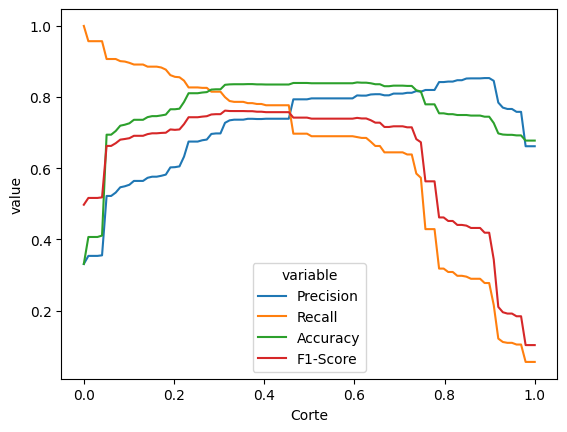

In [108]:
modelo_arvore = DecisionTreeClassifier(max_depth = 10)
modelo_arvore_ajustado = modelo_arvore.fit(X_train, y_train)
df_calibracao = grafico_calibracao(modelo_arvore_ajustado)

In [109]:
df_calibracao.sort_values('Accuracy', ascending=False).head(5)

,Corte,Precision,Recall,Accuracy,F1-Score
60,0.606061,0.804742,0.687723,0.841295,0.741645
62,0.626263,0.804196,0.685340,0.840505,0.740026
61,0.616162,0.804196,0.685340,0.840505,0.740026
47,0.474747,0.793758,0.697259,0.839716,0.742386
46,0.464646,0.793758,0.697259,0.839716,0.742386


Veja que, nesse caso, o melhor valor de corte está entre 0.4 e 0.6, então o corte de 0.5 já está bem próximo do ideal.

### Validação cruzada

No gráfico que compara a acurácia no treino e no teste para diferentes valores de `max_depth`, verificamos a acurácia do modelo várias vezes na base de teste. No entanto, o uso excessivo da base de teste pode levar a problemas de overfitting. Isso acontece porque o modelo pode acabar, de forma não intencional, se ajustando à base de teste. É como se esses dados estivessem sendo considerados no nosso treinamento, certo?

Idealmente, no entanto, devemos utilizar apenas a base de treino para tudo, sendo a base de testes escondida e apenas acessada para avaliar a qualidade do modelo final. Para isso, podemos usar a **validação cruzada**. A validação cruzada é uma técnica que divide **a base de treino** em várias partes, e ajusta o modelo em cada uma dessas partes, criando mini-bases de teste que depois são descartadas. Isso permite que o modelo seja ajustado usando somente a base de treino, sem sujá-lo com a base de teste, mas ainda permitindo avaliar a qualidade do modelo e lidar com overvitting.

A validação cruzada é uma técnica essencial para modelagem preditiva. É ela que nos permite utilizar modelos extremamente complexos, mas ainda controlando o overfitting.

<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500"/>
</div>

Para fazer a validação cruzada, portanto, partimos da base de treino.

A técnica mais tradicional de validação cruzada, que é a que vamos utilizar aqui, é a validação cruzada $k$-fold. Nessa técnica, dividimos a base de treino em $k$ partes (geralmente de forma aleatória), ajustamos o modelo em $k-1$ partes, e avaliamos na parte restante. Isso é feito $k$ vezes, de forma que cada parte é usada uma vez como base de teste. No final, tiramos a média das métricas de qualidade do modelo.

<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500"/>
</div>


### Validação cruzada para árvores

Para fazer a validação cruzada, precisamos de algumas ferramentas novas do scikit-learn. A primeira é a função `cross_validate`, que faz a validação cruzada para um modelo e uma base de dados. A segunda é a função `GridSearchCV`, que faz a validação cruzada para vários modelos e várias bases de dados, e nos ajuda a escolher o melhor modelo.

In [33]:
modelo_arvore = DecisionTreeClassifier(max_depth = 4)

scores = cross_validate(modelo_arvore, X_train, y_train, cv=10)

scores

{'fit_time': array([0.00647974, 0.00885916, 0.00438976, 0.00717497, 0.00400519,
        0.00399852, 0.00591993, 0.        , 0.03208375, 0.01122522]),
 'score_time': array([0.00114012, 0.00099874, 0.        , 0.00199366, 0.00100279,
        0.0010488 , 0.00202084, 0.        , 0.        , 0.00401521]),
 'test_score': array([0.81184211, 0.84210526, 0.82105263, 0.81052632, 0.81710526,
        0.81447368, 0.82236842, 0.83135705, 0.80105402, 0.81291173])}

É possível alterar o critério de avaliação utilizando o parâmetro `scoring`. Exemplos:

In [32]:
# F1-Score
scores_f1 = cross_validate(modelo_arvore, X_train, y_train, cv=10, scoring='f1')
print(scores_f1)

# AUC
scores_auc = cross_validate(modelo_arvore, X_train, y_train, cv=10, scoring='roc_auc')
print(scores_auc)

{'fit_time': array([0.        , 0.00599813, 0.00789595, 0.01025581, 0.00299811,
       0.00308943, 0.00399899, 0.00655508, 0.00657821, 0.00133991]), 'score_time': array([0.01123714, 0.00499964, 0.00109887, 0.0030067 , 0.00299239,
       0.00292087, 0.        , 0.        , 0.00299811, 0.00539613]), 'test_score': array([0.71905697, 0.75409836, 0.73745174, 0.71764706, 0.75134168,
       0.71856287, 0.72505092, 0.76811594, 0.71669794, 0.72692308])}
{'fit_time': array([0.0066762 , 0.00446558, 0.00524306, 0.0038445 , 0.00647974,
       0.00466228, 0.00517797, 0.00356984, 0.00442767, 0.00377846]), 'score_time': array([0.        , 0.0083046 , 0.00404763, 0.00251532, 0.00345397,
       0.00200653, 0.00185847, 0.00240993, 0.00274611, 0.00328207]), 'test_score': array([0.84815323, 0.89143025, 0.86869502, 0.8663511 , 0.87572677,
       0.87541475, 0.86933427, 0.87905049, 0.83757543, 0.87652204])}


Geralmente, o que fazemos é escolher vários métodos de scoring numa lista

In [37]:
criterios = ['f1', 'roc_auc', 'accuracy', 'precision', 'recall']

resultados = cross_validate(modelo_arvore, X_train, y_train, cv=10, scoring=criterios)

df_resultados = pd.DataFrame(resultados)

df_resultados

,fit_time,score_time,test_f1,test_roc_auc,test_accuracy,test_precision,test_recall
0,0.005008,0.011754,0.719057,0.848153,0.811842,0.750000,0.690566
1,0.001734,0.000000,0.754098,0.891430,0.842105,0.828829,0.691729
2,0.013973,0.001139,0.737452,0.868695,0.821053,0.757937,0.718045
3,0.000000,0.020305,0.717647,0.866351,0.810526,0.750000,0.687970
4,0.002509,0.010182,0.751342,0.875727,0.817105,0.716724,0.789474
5,0.006395,0.018292,0.718563,0.875415,0.814474,0.765957,0.676692
6,0.004304,0.010160,0.725051,0.869334,0.822368,0.791111,0.669173
7,0.003873,0.013084,0.768116,0.879050,0.831357,0.738676,0.800000
8,0.002861,0.015674,0.716698,0.837575,0.801054,0.712687,0.720755
9,0.005521,0.010748,0.726923,0.876522,0.812912,0.741176,0.713208


Para obter as estimativas de F1, AUC, acurácia, etc, podemos tomar a média dos resultados obtidos em cada iteração da validação cruzada.

In [38]:
df_resultados.mean()

fit_time          0.004618
score_time        0.011134
test_f1           0.733495
test_roc_auc      0.868825
test_accuracy     0.818480
test_precision    0.755310
test_recall       0.715761
dtype: float64

Isso tudo foi feito para um valor específico de `max_depth`. O que queremos na prática, no entanto, é escolher o melhor valor de `max_depth` para o modelo. Para isso, vamos usar a função `GridSearchCV`, que faz a validação cruzada para vários valores de `max_depth`, e nos ajuda a escolher o melhor valor. Isso é chamado de **grid search**, ou busca em grade, porque criamos uma grade dos chamados **hiperparâmetros** do modelo (neste caso, o `max_depth`), e testamos todos os valores possíveis. A função `GridSearchCV` nos dá o melhor valor de `max_depth` e o melhor modelo.

In [48]:
parametros = {
  'max_depth': range(1, 20)
}

modelo_arvore = DecisionTreeClassifier()

grid = GridSearchCV(modelo_arvore, parametros, scoring='f1', cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, scoring='f1')

Veja que, pelo grid search realizado e pela métrica escolhida (F1-Score), o melhor valor de `max_depth` é 7. Isso é um sinal de que o modelo de árvore de decisão com essa profundidade é o melhor modelo para a base de dados da Vivo.

Uma coisa que eu não contei é que existem vários outros parâmetros em uma árvore de decisão para controlar. Por exemplo, podemos controlar a quantidade mínima de observações em cada folha (o parâmetro `min_samples_leaf`), a quantidade mínima de observações em cada nó (o parâmetro `min_samples_split`), a quantidade máxima de variáveis a serem consideradas em cada nó (o parâmetro `max_features`), e muitos outros. O `GridSearchCV` nos permite testar todos esses parâmetros de uma vez, e escolher o melhor modelo. O único problema em fazer isso é que o número de modelos a serem testados cresce exponencialmente com o número de parâmetros. Por isso, é importante ter uma ideia do que cada parâmetro faz, e testar apenas os parâmetros mais importantes, ou então utilizar uma técnica de otimização mais sofisticada, como a otimização bayesiana (fora do escopo da nossa disciplina).

In [1]:
parametros = {
  'max_depth': range(5, 10),
  'min_samples_split': range(2, 10),
  'min_samples_leaf': range(5, 20)
}

modelo_arvore = DecisionTreeClassifier()

# obs: esse código pode demorar um pouco para rodar

grid = GridSearchCV(
  modelo_arvore,      # modelo que queremos usar
  parametros,         # parâmetros que queremos testar
  scoring=criterios,  # métricas que queremos avaliar
  refit='f1',    # métrica que queremos otimizar. Nesse caso, a AUC
  cv=10,              # número de folds na validação cruzada
  n_jobs=-1,          # número de processadores a serem usados, -1 significa todos
  verbose=1           # exibir mensagens, quanto maior o número, mais mensagens
)

grid.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

Com o grid search realizado, podemos ver que os valores que maximizam a AUC são `max_depth=9`, `min_samples_split=2` e `min_samples_leaf=11`. Isso significa que o modelo de árvore de decisão com esses parâmetros é o melhor modelo para a base de dados da Vivo a partir do critério da área abaixo da curva ROC.

In [95]:
grid.best_params_, grid.best_score_

({'criterion': 'gini',
  'max_depth': 9,
  'min_samples_leaf': 11,
  'min_samples_split': 2},
 0.8835200232556633)

Depois de realizar essa validação cruzada, podemos ajustar o modelo com os melhores parâmetros e ver como ele se comporta na base de teste.

In [126]:
# ajustando modelo com os melhores parâmetros

modelo_arvore_final = grid.best_estimator_

modelo_arvore_final.fit(X_train, y_train)
modelo_arvore_final.score(X_test, y_test)

0.837741808132649

Veja que a melhor acurácia ficou em torno de 84%, que é bem melhor que o modelo logístico, e também é melhor que o modelo de árvore com `max_depth=4`, que foi o melhor na verificação sem validação cruzada. Isso é um sinal de que o grid search foi bem-sucedido em encontrar o melhor modelo para a base de dados da Vivo.

Mas ainda pode ficar melhor! Agora, podemos otimizar a regra de corte para maximizar a acurácia.

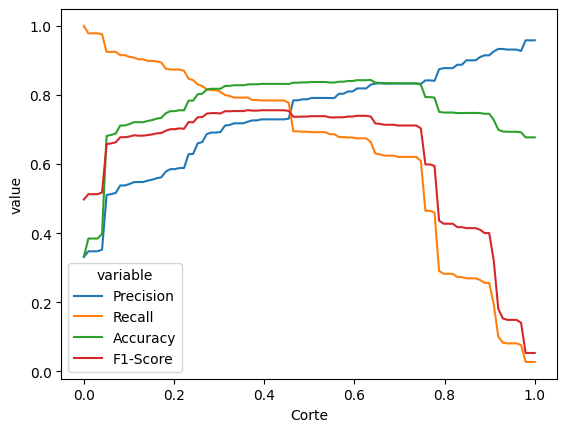

In [97]:
df_cortes = grafico_calibracao(modelo_arvore_final)

In [98]:
df_cortes.sort_values('Accuracy', ascending=False).head(5)

,Corte,Precision,Recall,Accuracy,F1-Score
63,0.636364,0.830104,0.663886,0.843664,0.737748
62,0.626263,0.819103,0.674613,0.842874,0.739869
61,0.616162,0.819103,0.674613,0.842874,0.739869
60,0.606061,0.819103,0.674613,0.842874,0.739869
59,0.595960,0.810271,0.676996,0.840505,0.737662


Finalizamos o conteúdo sobre árvores de decisão. Agora, vamos ver um outro tipo de modelo mais poderoso que a árvore de decisão, que é o modelo de floresta aleatória.

### Florestas aleatórias

A floresta aleatória é um dos algoritmos de machine learning mais famosos, sendo utilizado como "modelo base" para diversos problemas e competições como as do Kaggle. 

**Como funciona**: A floresta aleatória é uma coleção de árvores de decisão, que são ajustadas em subconjuntos aleatórios da base de dados. A previsão da floresta aleatória é a média das previsões de cada árvore.

**Por que funciona**: A floresta aleatória é um modelo muito poderoso porque consegue capturar a complexidade dos dados sem sofrer tanto de overfitting. Isso acontece porque, ao fazer uma média dos resultados de cada árvore, a floresta aleatória consegue capturar a tendência dos dados sem se ajustar demais à base de treino.

Vejamos no exemplo visual como seria essa floresta.


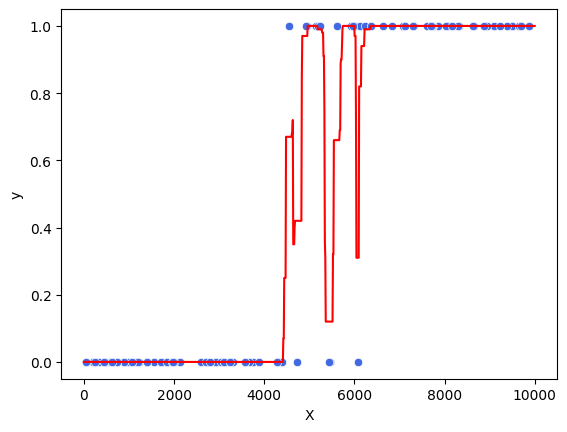

In [129]:
model = RandomForestClassifier()
grafico_modelo(model)

Veja que a floresta aleatória é capaz de criar regras complexas, mas também não são regras tão agressivas quanto as da árvore de decisão. Ou seja, ela conseguiria se adaptar tanto à estrutura de um modelo logístico quanto à estrutura de uma árvore de decisão.

Vamos ver agora uma grid search para a floresta aleatória. Vamos testar os seguintes valores:

- `n_estimators`: o número de árvores na floresta
- `max_depth`: a profundidade de cada árvore

Tecnicamente, seria possível testar muitos outros parâmetros, como `min_samples_split`, `min_samples_leaf`, `max_features`, etc. No entanto, isso pode ser muito custoso computacionalmente (considere que cada floresta aleatória pode estar rodando 100 árvores por baixo dos panos!)... Por isso, vamos testar apenas esses dois parâmetros.

In [153]:
parametros = {
  'n_estimators': [100, 200, 300],
  'max_depth': range(6, 15),
  'min_samples_split': range(2, 10),
}

modelo_floresta = RandomForestClassifier()

# obs: esse código pode demorar um pouco para rodar

grid = GridSearchCV(
  modelo_floresta,      # modelo que queremos usar
  parametros,         # parâmetros que queremos testar
  scoring=criterios,  # métricas que queremos avaliar
  refit='roc_auc',    # métrica que queremos otimizar. Nesse caso, a AUC
  cv=10,              # número de folds na validação cruzada
  n_jobs=-1,          # número de processadores a serem usados, -1 significa todos
  verbose=1           # exibir mensagens, quanto maior o número, mais mensagens
)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 15),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100, 200, 300]},
             refit='roc_auc',
             scoring=['f1', 'roc_auc', 'accuracy', 'precision', 'recall'],
             verbose=1)

Agora, temos o melhor modelo de floresta aleatória para a base de dados da Vivo. Vamos ver os hiperparâmetros:

In [154]:
grid.best_params_, grid.best_score_

({'max_depth': 9, 'min_samples_split': 9, 'n_estimators': 100},
 0.8886485989750245)

Agora, vamos ver como o modelo final (ajustado com todos os dados de treino) se comporta na base de teste.

In [155]:
# ajustando modelo com os melhores parâmetros

modelo_floresta_final = grid.best_estimator_

modelo_floresta_final.fit(X_train, y_train)
modelo_floresta_final.score(X_test, y_test)

0.8409001184366364

Agora, finalmente, podemos calibrar o valor de corte para maximizar a acurácia.

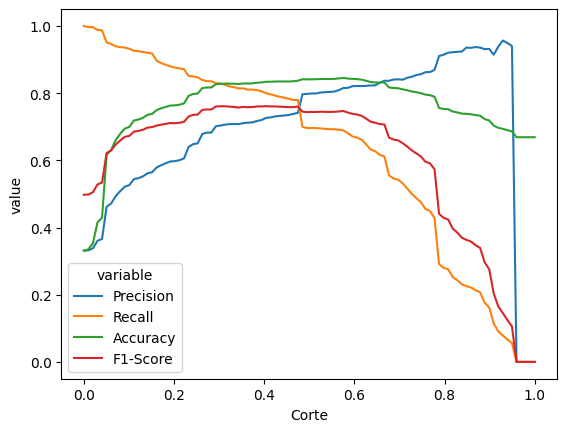

In [156]:
df_cortes = grafico_calibracao(modelo_floresta_final)

In [157]:
df_cortes.sort_values('Accuracy', ascending=False).head(5)

,Corte,Precision,Recall,Accuracy,F1-Score
57,0.575758,0.815233,0.688915,0.845243,0.746770
56,0.565657,0.808926,0.691299,0.843664,0.745501
58,0.585859,0.815714,0.680572,0.843269,0.742040
59,0.595960,0.820700,0.671037,0.842479,0.738361
55,0.555556,0.804709,0.692491,0.842479,0.744395
